<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks/blob/main/lab5_parzen_rosenblatt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ТЗ к лабораторной работе №5:**

Реализовать 3 генератора данных на плоскости или в пространстве (равномерное, Гаусс.распр, ... и др);

Написать реализацию метода Парзена-Розенблатта;

Восстановить плотность в виде картинки;

Для 1 из 3 наборов данных (п.1) применить оптимизацию ширины окна методом Leave One Out;

Для сгенерированных данных с 2-мя и более горбами применить EM-алгоритм из sckit-learn

In [532]:
import random
import math
import copy
import numpy as np
from typing import Mapping
from matplotlib import pyplot as plt

In [533]:
def draw_result(data_generator: Mapping, title: str, alpha: float = 2.0, beta: float = 3.0, width: float = 0.3, count: int = 10000):

  """Метод построения графика плотности распределения методом Парзена-Розенблатта.

     Args:
      data_generator: Mapping - набор точек непрерывного распределения
      title: str - содержание заголовка
      alpha: float (default: 2.) - параметр распределения
      beta: float (default: 3.) - параметр распределения
      h: float (default: 0.3) - ширина окна для метода
      count: int (default: 10000) - число точек
  """

  data = data_generator(alpha=alpha, beta=beta, count=count)

  x = np.linspace(min(data), max(data), count)

  fig, ax = plt.subplots(figsize=(10, 10))

  ax.plot(x, ParzenRosenblatt(x, width, data))

  ax.set_xlim((min(data), max(data)))
  ax.set_title("Восстановление плотности для " + title + f" \nПараметры: alpha={alpha}, beta={beta}", fontweight='bold')
  ax.set_xlabel('x')
  ax.set_ylabel('p`(x)')
  plt.show()

1. Генераторы данных (на плоскости)

Равномерное распредление.

Его функция имеет следующий вид:

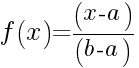

 Выразим x:

 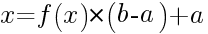

 f(x) заменяется на random.uniform(0, 1)

In [534]:

def distribution_uniform(alpha: float = 0.0, beta: float = 1.0) -> float:

  """Метод генерации точек, подчиняющийся равномерному распределению с указанными параметрами

  Args: 
    alpha: float (default: 0.) - параметр распределения - левая граница отрезка
    beta: float (default: 1.) - параметр распределения - правая граница отрезка

  Return:
    Значение случайно сгенерированной точки при заданных параметрах равномерного
    распределения (float)
"""
  return random.uniform(0, 1) * (beta - alpha) + alpha


def generator_uniform(alpha: float = 0.0, beta: float = 1.0, count: int = 100) -> list:

  """Метод генерации набора точек, подчиняющихся равномерному распределению с указанными
    параметрами

  Args: 
    alpha: float (default: 0.) - параметр распределения - левая граница отрезка
    beta: float (default: 1.) - параметр распределения - правая граница отрезка
    count: int (default: 100) - число сгенерированных точек

  Return:
    Набор точек, сгенерированных при заданных параметрах равномерного
    распределения
  """
  return [distribution_uniform(alpha, beta) for i in range(count)]

Экспоненциальное распределение.
Его функция имеет следующий вид:

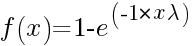

Выразим х:

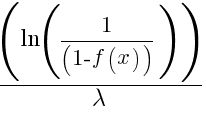

f(x) заменяется на random.uniform(0, 1)

lambda = alpha

In [535]:
def distribution_exponential(alpha: float = 0.1) -> float:

  """Метод генерации точеки, подчиняющийся экспоненциальному распределению с указанными параметрами

  Args: 
    alpha: float (default: 0.1) - параметр распределения: коэффициент масштаба

  Return:
    Значение случайно сгенерированной точки при заданных параметрах экспоненциального
    распределения (float)
 """
  return math.log(1 / (1 - random.uniform(0, 1))) / alpha


def generator_exponential(alpha: float = 0.1, beta: float = 0.0, count: int = 100) -> list:

  """Метод генерации набора точек, подчиняющихся экспоненциальному распределению с указанными
    параметрами.

  Args: 
    alpha: float (default: 0.) - параметр распределения коэффициент масштаба
    beta: float (default: 1.) - параметр, для обобщения методов (не используется)
    count: int (default: 100) - число сгенерированных точек

  Return:
    Набор точек, сгенерированных при заданных параметрах экспоненциального
    распределения
 """
  return [distribution_exponential(alpha) for i in range(count)]

Распределение Парето.
Его функция имеет следующий вид:

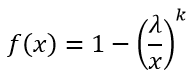

Выразим x: 

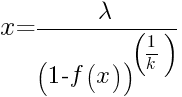

 f(x) заменяется на random.uniform(0, 1)

 lambda = alpha

In [536]:
def distribution_pareto(alpha: float = 1.0, k: float = 3.0) -> float:

  """Метод генерации точеки, подчиняющийся распределению Парето с указанными параметрами

  Args: 
    alpha: float (default: 1.0) - параметр распределения: коэффициент масштаба
    beta: float (default: 1.5) - параметр распределения: коэффициент формы

  Return:
    Значение случайно сгенерированной точки при заданных параметрах распределения
    Парето (float)
 """
  return alpha/((alpha - random.uniform(0, 1)) ** (1/k))


def generator_pareto(alpha: float = 1.0, beta: float = 1.5, count: int = 100) -> list:

  """Метод генерации набора точек, подчиняющихся распределению Парето с указанными
    параметрами

  Args: 
    alpha: float (default: 0.) - параметр распределения: коэффициент масштаба
    beta: float (default: 1.) - параметр распределения: коэффициент формы
    count: int (default: 100) - число сгенерированных точек

  Return:
    Набор точек, сгенерированных при заданных параметрах распределения Парето
 """
  return [distribution_pareto(alpha, beta) for i in range(count)]


2. Метод Парзена-Розенблатта

In [537]:
def kernel_Cauchy(x: float) -> float:

  """Метод возвращающий значение функции ядра Коши при указанных параметрах

  Args: 
    x: float - параметр функции ядра

  Return:
    Значение функции ядра Коши (float)
 """
  return 1 / (math.pi * (1 + x ** 2))


def ParzenRosenblatt(x: float, h: float, data: list) -> float:

  """Метод возвращающий значение, найденное методом Парзена-Розенблатта для группы точек

  Args: 
    x: float - параметр функции ядра
    h: float - параметр метода Парзена-Розенблатта - ширина окна
    data: list - набор точек

  Return:
    Значение найденное методом Парзена-Розенблатта для группы точек
 """
  return sum([kernel_Cauchy((x - i) / h) for i in data]) / (len(data) * h)

3. Восстановление плотностей

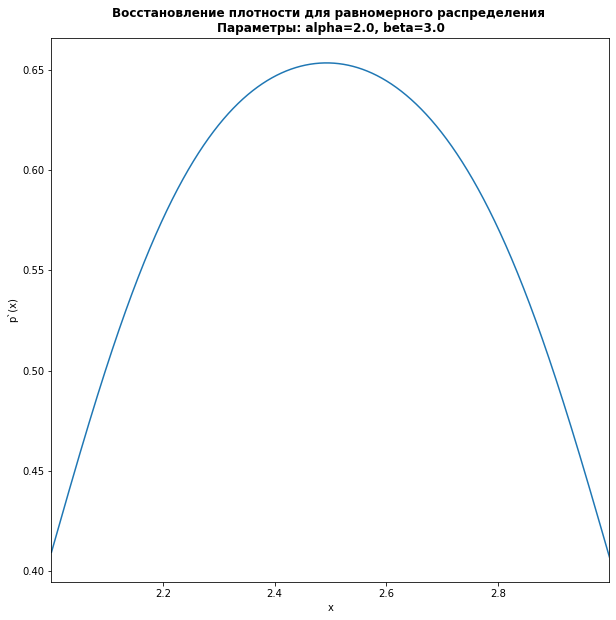

In [538]:
draw_result(generator_uniform, "равномерного распределения")

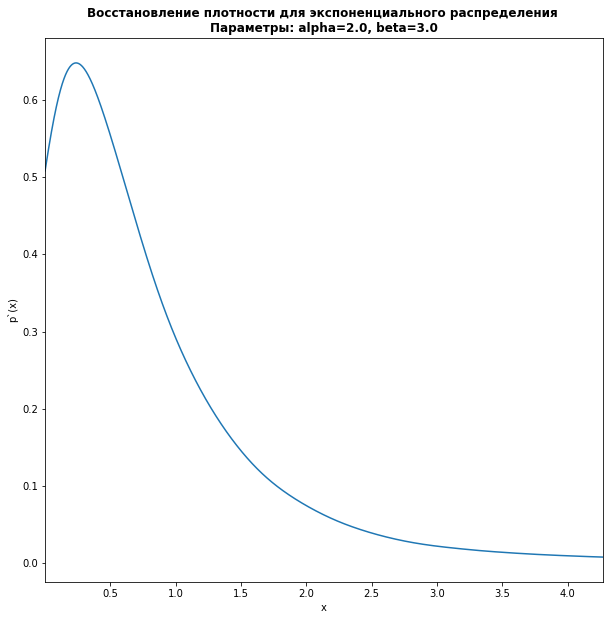

In [539]:
draw_result(generator_exponential, "экспоненциального распределения")

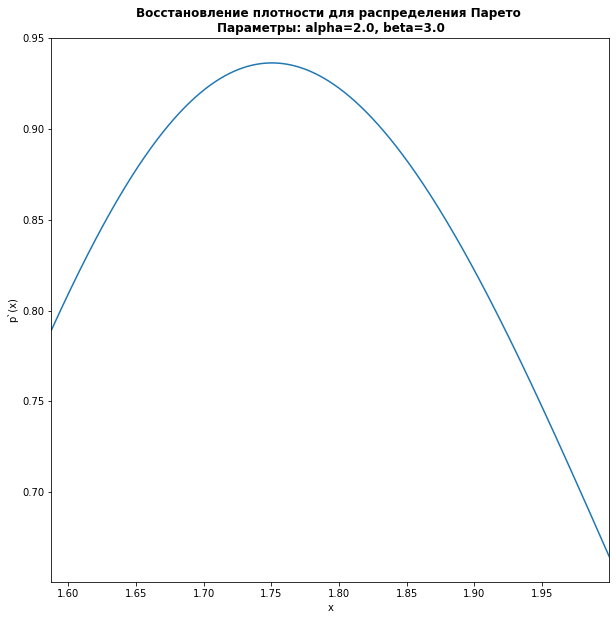

In [540]:
draw_result(generator_pareto, "распределения Парето")

4. Метод Leave One Out


In [541]:
def LOO(data: list, h: float) -> float:

  """Метод LOO

  Args:
    data: list - данные
    h: float - ширина окна

  Return: оптимизированная ширина окна
  """
  return -sum([math.log(ParzenRosenblatt(data[i], h, data[:i] + data[i+1:])) for i in range(len(data))])

print(f"Значение LOO при h = 0.1: {LOO(generator_pareto(count=1000), 0.1)}.")


Значение LOO при h = 0.1: 1486.288697961402.


5. EM-алгоритм

In [542]:
def two_functions(first_alpha: float = 1.0, first_k: float = 2.0, second_alpha: float = 2.0, second_k: float = 3.0) -> np.ndarray:
    res = []
    for i in range(10000):
        res.append(distribution_pareto(first_alpha, first_k))
        res.append(distribution_pareto(second_alpha, second_k))
    return np.array(res) 

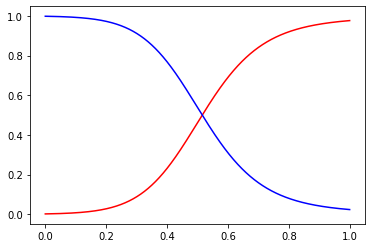

In [543]:
from sklearn.mixture import GaussianMixture

two_functions = two_functions().reshape(-1, 1)
gm = GaussianMixture(n_components=2, init_params='random', random_state=0).fit(two_functions)

x = np.linspace(0, 1, 20000)

y_red = gm.predict_proba(np.array(x).reshape(-1, 1))[:,0]
y_blue = gm.predict_proba(np.array(x).reshape(-1, 1))[:,1]

plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue') 

plt.show()